# Самостоятельная работа. 

# Задание №1.

In [16]:
from queue import LifoQueue, PriorityQueue
from PIL import Image
import numpy as np
from random import choice
from typing import List
import functools
import time
def maze_generation(width, height): # задаём ширину и высоту лабиринта.
    maze = Image.new('RGB', (2 * width + 1, 2 * height + 1), 'red') # при помощи функции мы генерируем картинку лабиринта.
    permission = maze.load() # загрузить лабиринт

    permission[1, 0] = (255, 255, 255) 
    permission[-2, -1] = (255, 255, 255)
    
    stack = LifoQueue() # жизненная очередь.
    cells = np.zeros((width, height))
    cells[0, 0] = 1 # координаты клеток лабиринта.
    stack.put((0, 0)) # положить в стэк.

    while not stack.empty():
        x, y = stack.get()

        coordinates = []
        if x > 0 and cells[x - 1, y] == 0: # данный цикл описывает генерацию матрицы.
            coordinates.append((x - 1, y))
        if x < width - 1 and cells[x + 1, y] == 0:
            coordinates.append((x + 1, y))
        if y > 0 and cells[x, y - 1] == 0:
            coordinates.append((x, y - 1))
        if y < height - 1 and cells[x, y + 1] == 0:
            coordinates.append((x, y + 1))

        if coordinates:
            stack.put((x, y))

            neighbour = choice(coordinates)
            neighbour_on_img = (neighbour[0]*2 + 1, neighbour[1]*2 + 1)
            current_on_img = (x*2 + 1, y*2 + 1)
            wall_to_remove = (neighbour[0] + x + 1, neighbour[1] + y + 1)

            permission[neighbour_on_img] = (255, 255, 255)
            permission[current_on_img] = (255, 255, 255)
            permission[wall_to_remove] = (255, 255, 255)

            cells[neighbour] = 1
            stack.put(neighbour)

    return maze

    


width = 250
height = 250


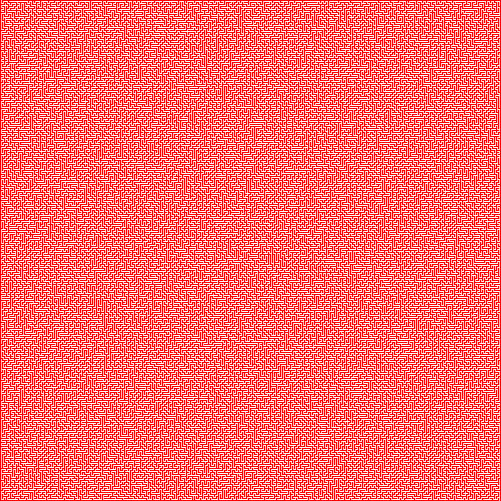

In [17]:
width = int(input('width = '))
height = int(input('height = '))

size = (width, height)

maze = maze_generation(*size)
maze.save("D:\\sam\\labirint.png") # сохраняем картинку лабиринта в PNG формате.
maze